In [ ]:
pip install mne

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import mne
from mne.decoding import UnsupervisedSpatialFilter
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# subject_list = [1,2,3,4,5,8,9,10,11,12,13,14,15,16,18,20,21,22,23,24,26,27] #20,23 error, 6/7 replicate
#subject_list_valid = [1,2,3,4,5,8,9,10,11,12,13,14,15,16,18,21,22,24,26]
subject_list_valid = [1,2]
eeg = {}
epochs = {}
for i in subject_list_valid:
    # dataPath =  'Colab Notebooks' + 'Dataset-2-EEG_images/' 
    dataPath = '/content/drive/MyDrive/Dataset-2-EEG_images/'
    datafilename =  dataPath + str(i)+'-P-cleaned.fif'
    print(i)
    eeg[i] = mne.read_epochs(datafilename)
    epochs[i] = eeg[i].get_data()

1
Reading /content/drive/MyDrive/Dataset-2-EEG_images/1-P-cleaned.fif ...
    Found the data of interest:
        t =       0.00 ...    1496.09 ms
        0 CTF compensation matrices available
0 bad epochs dropped


<ipython-input-4-a431907b1935>:11: RuntimeWarning: This filename (/content/drive/MyDrive/Dataset-2-EEG_images/1-P-cleaned.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  eeg[i] = mne.read_epochs(datafilename)


Not setting metadata
371 matching events found
No baseline correction applied
0 projection items activated
2
Reading /content/drive/MyDrive/Dataset-2-EEG_images/2-P-cleaned.fif ...
    Found the data of interest:
        t =       0.00 ...    1496.09 ms
        0 CTF compensation matrices available


<ipython-input-4-a431907b1935>:11: RuntimeWarning: This filename (/content/drive/MyDrive/Dataset-2-EEG_images/2-P-cleaned.fif) does not conform to MNE naming conventions. All epochs files should end with -epo.fif, -epo.fif.gz, _epo.fif or _epo.fif.gz
  eeg[i] = mne.read_epochs(datafilename)


0 bad epochs dropped
Not setting metadata
880 matching events found
No baseline correction applied
0 projection items activated


In [ ]:
eeg[1].event_id 

{'FN': 0, 'FP': 1, 'FU': 2, 'NN': 3, 'NP': 4, 'NU': 5}

In [ ]:
for i in subject_list_valid:
    print('Object'+str(i)+':')
    familiar_all = eeg[i]['FU', 'FP', 'FN']
    print('Number of trials in all FAMILIAR conditions: ', familiar_all.get_data().shape[0])
    novel_all = eeg[i]['NU', 'NP', 'NN']
    print('Number of trials in all NOVEL conditions: ', novel_all.get_data().shape[0])

Object1:
Number of trials in all FAMILIAR conditions:  297
Number of trials in all NOVEL conditions:  74
Object2:
Number of trials in all FAMILIAR conditions:  686
Number of trials in all NOVEL conditions:  194


In [ ]:
import numpy as npfrom 
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

df = {}
for i in subject_list_valid:
  df[i] = eeg[i].to_data_frame()
  index = df[i].loc[:,'condition']
  x = df[i].loc[:,'Fp1':'O2'].values
  x= StandardScaler().fit_transform(x)
  pca = PCA(n_components=20)
  p = pca.fit_transform(x)
  pf = pd.DataFrame(data = p)
  df[i] = pd.concat([index,pf],axis=1)


dataF = pd.concat(df)
print(dataF)


         condition         0         1         2         3         4  \
1 0             FP -2.984035 -0.110480 -0.538259 -0.580229 -1.597166   
  1             FP -1.637993  0.466713  0.981054 -0.657734 -0.074217   
  2             FP  0.080881  1.778629  2.611657 -0.344500  1.544395   
  3             FP  1.181980  3.401735  3.826336  0.301703  2.596748   
  4             FP  0.892270  4.683395  4.150320  1.028505  2.608083   
...            ...       ...       ...       ...       ...       ...   
2 337915        NN  1.511875  4.483044  2.304419  0.443613 -4.024929   
  337916        NN  1.080819  3.876824  1.113442  0.766028 -4.050124   
  337917        NN  0.860129  2.999837  0.093617  0.819405 -3.994793   
  337918        NN  0.838796  1.905509 -0.524487  0.690365 -3.857568   
  337919        NN  0.956768  0.755190 -0.624939  0.547729 -3.633592   

                 5         6         7         8  ...        10        11  \
1 0      -0.285032 -0.450159  1.487187 -0.743803  ... -0.5

In [ ]:
dataF['condition'].value_counts()

FP    129792
FN    124416
FU    123264
NN     36096
NP     34560
NU     32256
Name: condition, dtype: int64

In [ ]:
label_mapping = {'FN': 0, 'FP': 0, 'FU': 0, 'NN': 1, 'NP': 1, 'NU': 1}
dataF['condition'] = dataF['condition'].replace(label_mapping)
dataF['condition'].value_counts()

0    377472
1    102912
Name: condition, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
Y = dataF.pop('condition')
X = dataF
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.6)

In [ ]:
X_train

0         1         2         3         4         5  \
2 123740  1.403604 -1.087191 -1.684714 -0.380037  2.264946  0.958663   
  2194    0.221075 -2.710854 -2.304097 -2.728841 -0.231937  2.455906   
  245280 -0.207507  3.457797  0.786598 -0.976819  0.283165  1.078192   
  282317  6.234716 -0.634939  1.186537 -0.878979 -1.871863 -2.375178   
  144647 -3.329417  1.707563 -3.051272  0.529569 -1.687047  0.264317   
...            ...       ...       ...       ...       ...       ...   
  255555  2.402140 -2.209230 -0.149202  2.725906  1.155680 -3.362263   
  39783   1.288190 -1.386832  1.622500 -0.177042 -1.802862 -0.526687   
1 725    -7.535029 -2.246345  7.823492 -1.382708  2.720507 -3.886467   
  124258 -2.181831  2.847493  6.375933 -4.574316 -2.519369 -1.393743   
2 180834  3.174735 -1.325061 -7.887101 -2.179506  0.527861 -2.805279   

                 6         7         8         9        10        11  \
2 123740  0.547078  0.920209  0.653191 -0.038155 -0.398027  0.199509   
  2194    0.367955  0.000381 -0.378137  0.355111 -1.011297 -0.112923   
  245280 -1.015708 -0.109169  0.722249  1.272513 -1.030489 -0.731369   
  282317  2.365369  1.680749 -0.502178  0.987801 -0.318453  0.240016   
  144647 -0.849216  0.307264  1.717665  1.752182 -0.685025 -0.909148   
...            ...       ...       ...       ...       ...       ...   
  255555  0.684675 -0.925966 -0.319849  1.083473  0.619109  0.206962   
  39783   1.006387  0.823843 -0.676766 -1.001045  0.502804  0.237069   
1 725    -1.110311 -1.359969  0.993782 -1.197908 -0.956046 -0.173954   
  124258 -0.801625  0.545754 -0.422802 -0.150729 -1.819094  1.386658   
2 180834 -0.813595 -0.829319 -0.562931 -0.534968  1.760115 -0.101819   

                12        13        14        15        16        17  \
2 123740 -0.321085  0.397769  0.100289 -0.180677  0.193837 -0.478871   
  2194    1.384208  0.782789 -1.041155  0.329259  0.188712  0.674163   
  245280 -0.368164 -0.724708 -1.217740  0.433064  1.346971  0.998105   
  282317 -0.912652 -0.311034 -0.027114 -0.561309 -0.010780 -0.361802   
  144647  1.661280  0.665359  0.591991 -0.206030  0.271131  0.590306   
...            ...       ...       ...       ...       ...       ...   
  255555 -0.311729  1.371916  0.668673  0.182648 -0.218529  1.016656   
  39783  -0.208921  0.531520  0.359677 -0.841105  0.297447 -0.418866   
1 725    -0.238514  2.748755 -0.620788 -0.042830  1.849892 -0.901858   
  124258 -0.050902 -0.859184  0.176808  0.873121 -0.667880  0.896242   
2 180834 -0.864542 -2.001113 -0.353135  0.889691  0.667230 -0.297615   

                18        19  
2 123740  0.078397  0.572362  
  2194    1.860172  0.050839  
  245280 -0.115969 -0.323407  
  282317  0.175698  0.204412  
  144647  0.461561 -1.099200  
...            ...       ...  
  255555 -0.388158 -0.417637  
  39783   1.632967 -2.217562  
1 725     0.658297 -1.380323  
  124258  0.470410  0.129646  
2 180834 -0.010558 -0.385709  

[288230 rows x 20 columns]

In [ ]:
X_train = np.array(X_train).reshape((X_train.shape[0],X_train.shape[1],1))
X_test = np.array(X_test).reshape((X_test.shape[0],X_test.shape[1],1))
Y_train = pd.get_dummies(Y_train)
Y_test = pd.get_dummies(Y_test)

In [ ]:
Y_train

0  1
2 123740  1  0
  2194    1  0
  245280  1  0
  282317  1  0
  144647  1  0
...      .. ..
  255555  1  0
  39783   1  0
1 725     1  0
  124258  1  0
2 180834  0  1

[288230 rows x 2 columns]

In [ ]:
X_train.shape

(288230, 20, 1)

In [ ]:
import tensorflow.compat.v1 as tf
from tensorflow.keras.layers import Dense, Activation, Flatten, concatenate, Input, Dropout, LSTM, Bidirectional,BatchNormalization,PReLU,ReLU,Reshape
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow import keras
from tensorflow.keras.layers import Conv1D,Conv2D,Add
from tensorflow.keras.layers import MaxPool1D, MaxPooling2D

inputs = tf.keras.Input(shape=(X_train.shape[1],1))

gru = tf.keras.layers.GRU(256, return_sequences=True)(inputs)
flat = Flatten()(gru)
outputs = Dense(2, activation='softmax')(flat)

model = tf.keras.Model(inputs, outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 20, 1)]           0         
                                                                 
 gru (GRU)                   (None, 20, 256)           198144    
                                                                 
 flatten (Flatten)           (None, 5120)              0         
                                                                 
 dense (Dense)               (None, 2)                 10242     
                                                                 
Total params: 208,386
Trainable params: 208,386
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def train_model(model,x_train, y_train,x_test,y_test, epoch = 2):

        model.compile(optimizer='adam',
                  loss=['categorical_crossentropy'],
                  metrics=['accuracy'])
        
        history = model.fit(x_train,y_train,
                        batch_size=32,
                        epochs=epoch,
                        validation_split=0.2,
                        callbacks=[
                          tf.keras.callbacks.EarlyStopping(
                          monitor='val_loss',
                          patience=4,
                          restore_best_weights=True)]
        )
        
        return model,history

In [ ]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

model,history = train_model(model, X_train, Y_train,X_test, Y_test, epoch = 30) 

Epoch 1/30
7206/7206 [==============================] - 460s 64ms/step - loss: 0.5086 - accuracy: 0.7866 - val_loss: 0.4990 - val_accuracy: 0.7881
Epoch 2/30
7206/7206 [==============================] - 458s 64ms/step - loss: 0.4817 - accuracy: 0.7967 - val_loss: 0.4592 - val_accuracy: 0.8049
Epoch 3/30
7206/7206 [==============================] - 468s 65ms/step - loss: 0.4283 - accuracy: 0.8187 - val_loss: 0.4042 - val_accuracy: 0.8277
Epoch 4/30
7206/7206 [==============================] - 454s 63ms/step - loss: 0.3600 - accuracy: 0.8486 - val_loss: 0.3365 - val_accuracy: 0.8586
Epoch 5/30
7206/7206 [==============================] - 456s 63ms/step - loss: 0.3011 - accuracy: 0.8743 - val_loss: 0.2966 - val_accuracy: 0.8776
Epoch 6/30
7206/7206 [==============================] - 457s 63ms/step - loss: 0.2575 - accuracy: 0.8936 - val_loss: 0.2707 - val_accuracy: 0.8905
Epoch 7/30
7206/7206 [==============================] - 455s 63ms/step - loss: 0.2216 - accuracy: 0.9091 - val_loss: 0

In [ ]:
model_acc = model.evaluate(X_test, Y_test, verbose=0)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

Test Accuracy: 94.225%


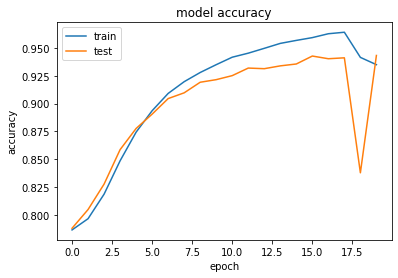

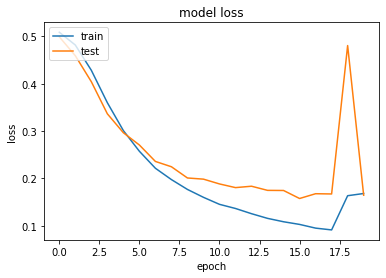

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

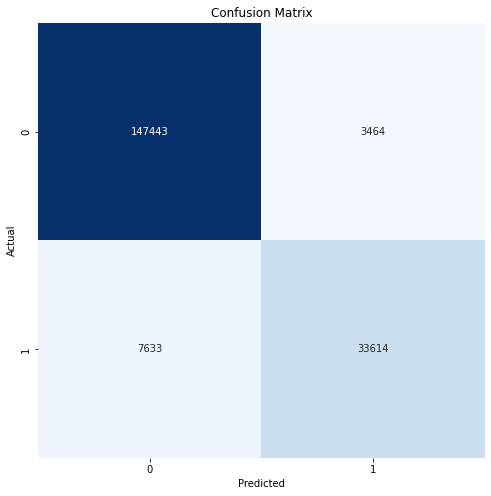

Classification Report:
----------------------
               precision    recall  f1-score   support

           0       0.95      0.98      0.96    150907
           1       0.91      0.81      0.86     41247

    accuracy                           0.94    192154
   macro avg       0.93      0.90      0.91    192154
weighted avg       0.94      0.94      0.94    192154



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
y_test = Y_test.idxmax(axis=1)

cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred)

plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n----------------------\n", clr)